In [213]:
# To understand the popularity and distribution of artists and songs
# To analyze trends in music releases over time
# To explore the relationship between different streaming metrics
# Loading necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
# Importing the data
df=pd.read_csv('spotify.csv', encoding= 'latin-1')
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [215]:
# Gathering the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [216]:
### DATA CLEANSING
# Check for missing values 
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [217]:
# Replace NaN w mode for object dtype
mode_value=df['Artist'].mode().iloc[0]
df['Artist']=df['Artist'].fillna(mode_value)

In [218]:
# Drop most columns w missing value
df.drop(columns=['TIDAL Popularity', 'Soundcloud Streams', 'SiriusXM Spins'], axis=1, inplace=True)

In [219]:
df.head(2)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"150,597,040",210.0,"40,975",62.0,"17,598,718",114.0,"18,004,655","22,931","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"156,380,351",188.0,"40,778",67.0,"10,422,430",111.0,"7,780,028","28,444","1,118,279",1


In [220]:
# Adjust the format of date
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [221]:
df['Release Month'] = df['Release Date'].dt.month
df['Release Date']

0      2024-04-26
1      2024-05-04
2      2024-03-19
3      2023-01-12
4      2024-05-31
          ...    
4595   2017-09-05
4596   2018-07-27
4597   2020-02-28
4598   2016-11-08
4599   2017-04-11
Name: Release Date, Length: 4600, dtype: datetime64[ns]

In [222]:
df['Release Month']

0        4
1        5
2        3
3        1
4        5
        ..
4595     9
4596     7
4597     2
4598    11
4599     4
Name: Release Month, Length: 4600, dtype: int32

In [223]:
df['Release Year'] = df['Release Date'].dt.year
df['Release Year']

0       2024
1       2024
2       2024
3       2023
4       2024
        ... 
4595    2017
4596    2018
4597    2020
4598    2016
4599    2017
Name: Release Year, Length: 4600, dtype: int32

In [224]:
# Correcting the data types 
object_columns = df.select_dtypes(include=['object']).columns

for col in object_columns:
    try:
        df[col] = df[col].str.replace(',', '').astype(float)
    except ValueError:
        pass

df.dtypes

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                        float64
Track Score                          float64
Spotify Streams                      float64
Spotify Playlist Count               float64
Spotify Playlist Reach               float64
Spotify Popularity                   float64
YouTube Views                        float64
YouTube Likes                        float64
TikTok Posts                         float64
TikTok Likes                         float64
TikTok Views                         float64
YouTube Playlist Reach               float64
Apple Music Playlist Count           float64
AirPlay Spins                        float64
Deezer Playlist Count                float64
Deezer Playlist Reach                float64
Amazon Playlist Count                float64
Pandora St

In [225]:
# Replace missing values of float dtypes w mean
float64_columns = df.select_dtypes(include=['float64']).columns

for col in float64_columns:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4600 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   float64       
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4600 non-null   float64       
 8   Spotify Playlist Count      4600 non-null   float64       
 9   Spotify Playlist Reach      4600 non-null   float64       
 10  Spotify Popularity          4600 non-null   float64       
 11  YouTube Views               4600 non-null   float64     

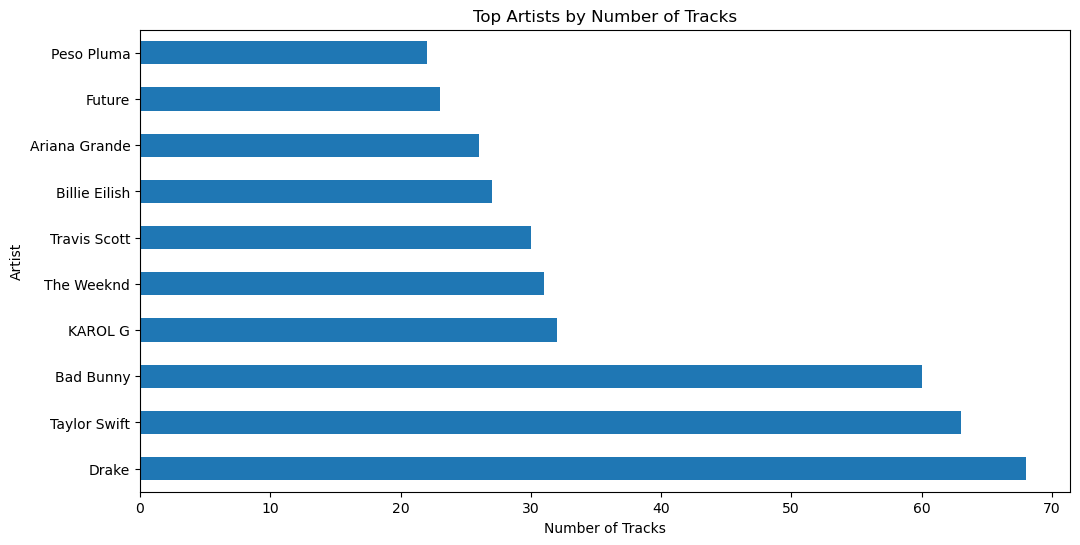

In [226]:
### DATA VISUALIZATION
# To understand the popularity and distribution of artists and songs
# 1. Top Artists by Number of Tracks
top_artists = df['Artist'].value_counts().head(10)
top_artists.plot(kind='barh', figsize=(12, 6))
plt.title('Top Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

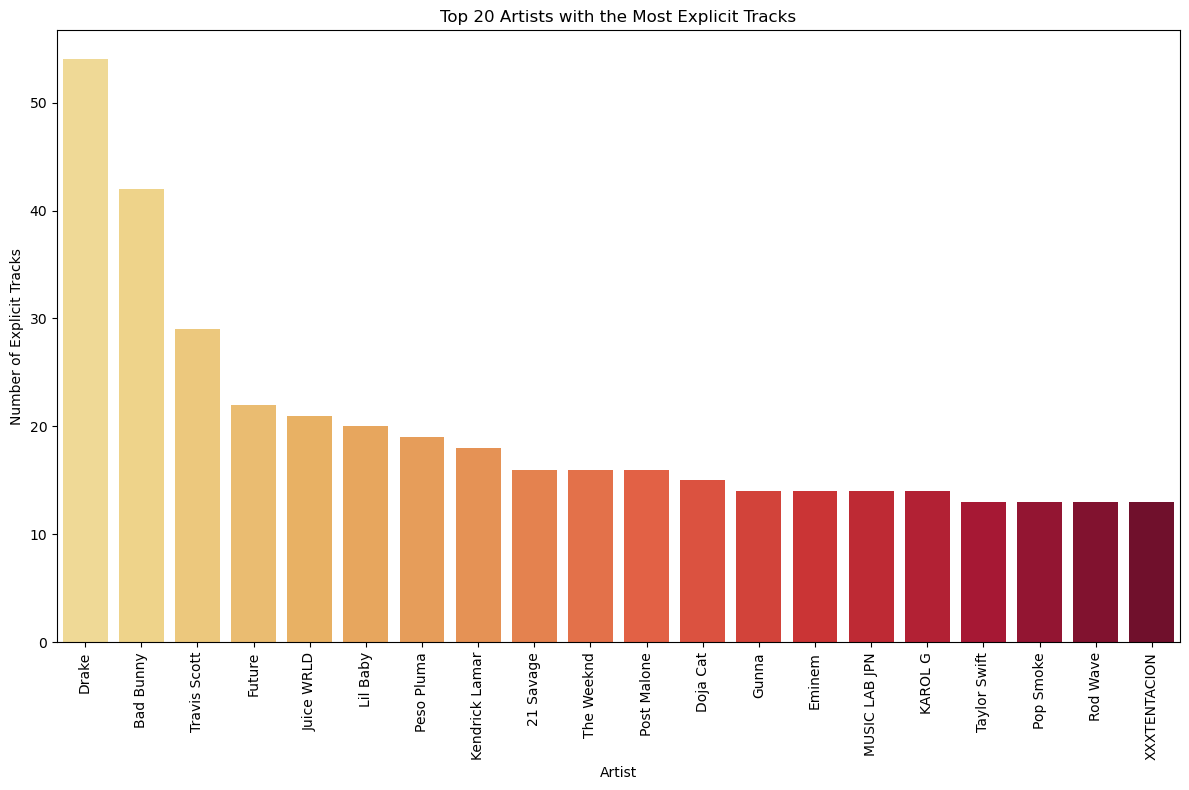

In [228]:
# 2. Top Explicit Artists
# Create a new DataFrame with the count of explicit tracks per artist
explicit_tracks_by_artist = df.groupby('Artist')['Explicit Track'].sum().reset_index()
explicit_tracks_by_artist = explicit_tracks_by_artist.sort_values('Explicit Track', ascending=False).head(20)

# Create a custom colormap with a gradient effect
cmap = plt.get_cmap('YlOrRd')
colors = cmap(np.linspace(0.2, 1, len(explicit_tracks_by_artist)))

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Artist', y='Explicit Track', data=explicit_tracks_by_artist, palette=colors)
plt.title('Top 20 Artists with the Most Explicit Tracks')
plt.xlabel('Artist')
plt.ylabel('Number of Explicit Tracks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

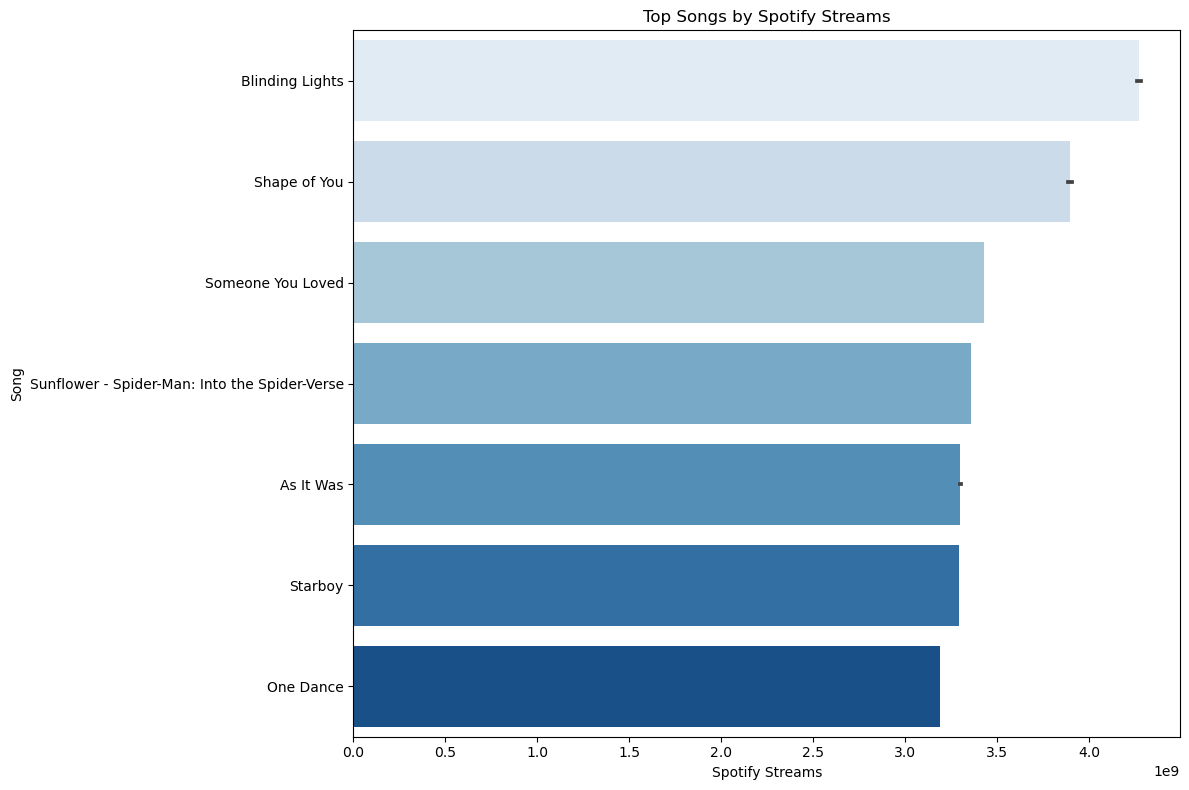

In [229]:
# 3. Top Songs in Spotify
# Sort the DataFrame by Spotify Streams in descending order
top_spotify_songs = df.sort_values('Spotify Streams', ascending=False).head(10)

# Create a horizontal bar plot with a monotone color scheme
plt.figure(figsize=(12, 8))
sns.barplot(x='Spotify Streams', y='Track', data=top_spotify_songs, orient='h', palette='Blues')
plt.title('Top Songs by Spotify Streams')
plt.xlabel('Spotify Streams')
plt.ylabel('Song')
plt.tight_layout()
plt.show()

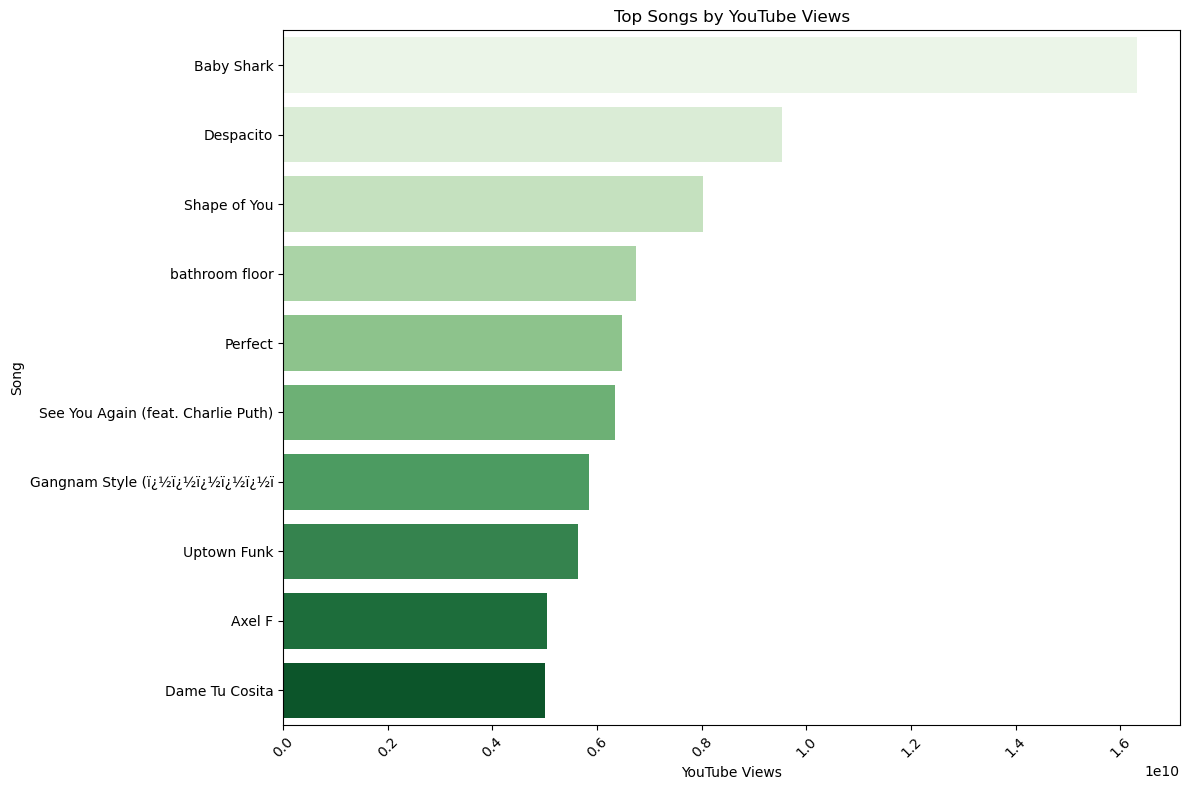

In [230]:
# 4. Top Songs in YouTube
# Sort the DataFrame by YouTube Views in descending order
top_youtube_songs = df.sort_values('YouTube Views', ascending=False).head(10)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='YouTube Views', y='Track', data=top_youtube_songs, orient='h', palette='Greens')
plt.title('Top Songs by YouTube Views')
plt.xlabel('YouTube Views')
plt.ylabel('Song')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

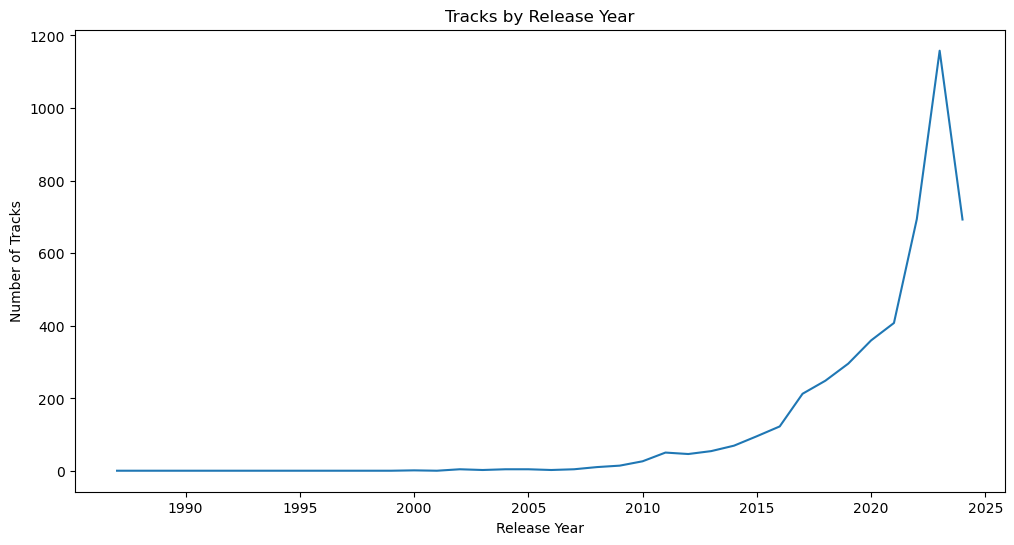

In [227]:
# To analyze trends in music releases over time
# 5o. Tracks by Release Year
df['Release Year'].value_counts().sort_index().plot(kind='line', figsize=(12, 6))
plt.title('Tracks by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Tracks')
plt.show()

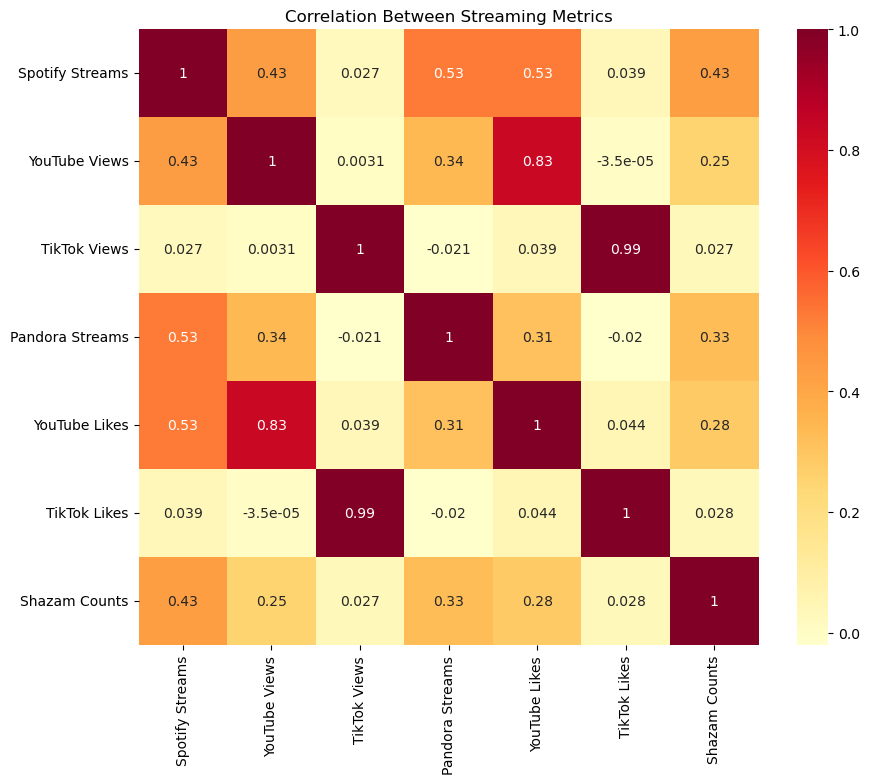

In [231]:
# To explore the relationship between different streaming metrics
# 6. Correlation Matrix between Platforms
# Select the relevant numeric columns
numeric_cols = ['Spotify Streams', 'YouTube Views', 'TikTok Views', 'Pandora Streams',
                'YouTube Likes', 'TikTok Likes', 'Shazam Counts']
numeric_df = df[numeric_cols]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlOrRd')
plt.title('Correlation Between Streaming Metrics')
plt.show()